(02-marginals)=
# Single-uncertainties: Marginal Distributions


In [1]:
# Cell removed
import grama as gr
import plotnine as pt
import numpy as np
DF = gr.Intention()



**Learning Objectives** In this chapter, you will learn

- how to use an exploratory analysis to inform probability modeling
- the importance of picking a distribution model
- factors to consider in picking a distribution model

(Key ideas to cover:)
- how context should affect fitting
- use exploratory analysis to gain insights
- use data-to-model comparison to do sanity checks
- distribution model dictates behavior in extrapolation
  - testing a family, making conservative choices
- physical principles -> bounds
- tail weight?


## Modeling a Parametric Uncertainty

---

Aim: Use a distribution to describe a [parametric uncertainty](02-uncertainty).


### Why model an uncertain quantity?

- Make our model assumptions explicit
  - cf. below with summary statistics and implicit assumptions
- Enable propagation
- Enable inference


### Follow the Modeling Process

To model an uncertain quantity we follow the [modeling process](02-modeling-process). Below we highlight some of the particular considerations to modeling a parametric uncertainty.


### Start with a modeling question

As we saw at the [top of this chapter](02-distributions), we have two different modeling questions that we seek to answer: the *materials selection* question, and the *structural sizing* question.


### Check the context

The *materials selection* context will be followed-up with more detailed analysis later in the design process. Thus modeling should be detailed enough to compare materials and consider relevant factors, but not so detailed as to cause analysis paralysis. This means we need to model each material separately, but our distribution model can be relatively rough.

In contrast, the *structural sizing* context will be the last step before finalizing design, and has direct impact on the safety of the structure. Modeling here must be detailed enough to confidently ensure the desired level of safety.


### Gather appropriate information

**Modeling using Facts**

For *materials selection*, given that we only need a rough model, we can review supplier-provided data on material properties. If a supplier has used a rigorous process to characterize their supply, they should have both mean and variance information available. We can also request information on the sample size (number of tests) used to arrive at their data.

With this mean and variance information in-hand, we can build a simple model for variability by *matching* the distribution parameters to these values. This leaves the selection of the distribution, which we must do using knowledge of the underlying phenomenon.


*Distribution selection* To model the variability of material properties, we might be tempted to select a normal distribution. However, the normal distribution has infinite support, meaning it allows the possibility of positive and negative values regardless of its mean and variance. For material properties that tend to be distributed roughly symmetrically and have small variability, a normal model should be sufficient as a crude model.

However, other material properties exhibit a great deal more asymmetry in their realized properties; for example, the realized strength of material will tend to be distributed asymmetrically (as we will see below). A "weakest-link" argument provides a theoretical basis for using the Weibull distribution to model material strength {cite}`weibull1939theory`, though a generalization of the Weibull distribution is used in the aircraft industry {cite}`MMPDS`, and the lognormal distribution is also occasionally used {cite}`delRosario2021pmi`.

For the purposes of the *materials selection* context, it is more important to make a reasonable decision, rather than a perfect decision. For the purposes of comparing materials, and to take advantage of analytic tractability in a later stage of analysis, we will assume a lognormal distribution for material properties {cite}`delRosario2021pmi`.


*Distribution parameters* TODO


**Modeling using Data**

For *structural sizing*, to develop values that are trustworthy for design, we must follow a more data-informed process. 

First, before extensive data collection, In manufacturing we must ensure that the material in question follows a published manufacturing standard[^standard], in order to ensure an acceptable level of consistency in the manufacture of components. 

Then, a sufficient quantity of data is gathered to understand the material variability. For instance, in aerospace design an absolute minimum of $n=100$ observations is required to be considered trustworthy {cite}`MMPDS`.

Finally, we use a combination of the data and our knowledge of the underlying phenomenon to choose and fit a distribution. We will see a concrete example of this using materials data below.

```{admonition} Shortcuts in aerospace design
The data collection process above is very expensive! In the aerospace industry this cost is somewhat offset through an effective pooling of resources: The results of extensive metallic materials characterization are collected in *Metallic Materials Properties Development and Standardization* (MMPDS){cite}`MMPDS`, which provides *allowable* material properties used in design. While this approach has lead to safe aircraft in the past, there are known flaws with this "allowable" value approach, which we will see in a later chapter {cite}`zdr2021allowables`.
```

*Exploratory Data Analysis*

Load the steel alloy dataset to illustrate. More information is available in the Appendix entry on the aluminum die castings TODO.


In [2]:
from grama.data import df_shewhart
df_shewhart.head()


,specimen,tensile_strength,hardness,density
0,1,29314,53.0,2.666
1,2,34860,70.2,2.708
2,3,36818,84.3,2.865
3,4,30120,55.3,2.627
4,5,34020,78.5,2.581


Basic facts


In [3]:
(
    df_shewhart
    >> gr.tf_summarize(
        T_mean=gr.mean(DF.tensile_strength),
        T_sd=gr.sd(DF.tensile_strength),
        T_skew=gr.skew(DF.tensile_strength),
        T_kurt=gr.kurt(DF.tensile_strength),
    )
    >> gr.tf_mutate(
        T_cov=DF.T_sd / DF.T_mean
    )
)

,T_mean,T_sd,T_skew,T_kurt,T_cov
0,31869.366667,3996.380795,0.099848,2.605644,0.125399


A histogram gives us a visual sense of shape for the data


/Users/zach/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.


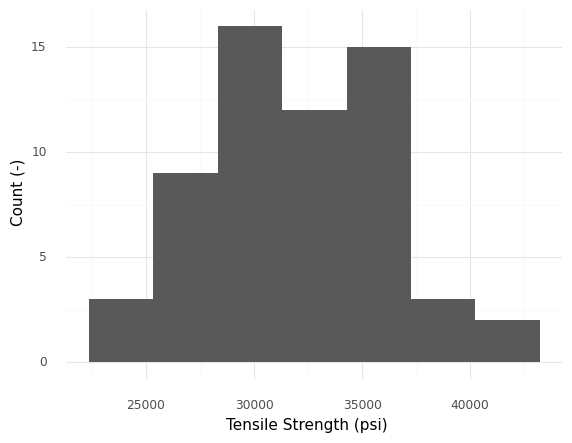

<ggplot: (8793141783417)>

In [4]:
(
    df_shewhart
    >> pt.ggplot(pt.aes("tensile_strength"))
    + pt.geom_histogram()
    + pt.theme_minimal()
    + pt.labs(x="Tensile Strength (psi)", y="Count (-)")
)

*Observations*:
- broad distribution, centered around 32500 psi

As described in the [Appendix on Exploratory Data Analysis](app-eda), rule 1 of histograms is "play with the bin size".

In [5]:
(
    df_ruff
    >> pt.ggplot(pt.aes("TYS"))
    + pt.geom_histogram(bins=20)
    + pt.theme_minimal()
)

NameError: name 'df_ruff' is not defined

The finer-grained histogram maintains the features we say above
- concentration still near 158 ksi
- still just one outlier at a much-larger value


TODO What does this tell us about building the model?


### Build the model


*Materials Selection*


*Structural Sizing*


In [ ]:
mg_gengamma = gr.marg_named(df_ruff.TYS, "gengamma")


### Assess the model


Summaries make implicit modeling assumptions


In [ ]:
mg = gr.marg_named(df_ruff.TYS, "norm")
## TODO: Add a string representation to marginals, to simplify printing
print(mg.d_name, mg.d_param)


The normal distribution has only two parameters: `loc` (the mean) and `scale` (the standard deviation). However, not all distributions are described by just two parameters.


In [ ]:
mg = gr.marg_named(df_ruff.TYS, "weibull_min")
## TODO: Add a string representation to marginals, to simplify printing
print(mg.d_name, mg.d_param)


The weibull distribution comes in a three-parameter form, with an additional "shape" parameter `c`.


Summary statistics are **not** model-free; we're actually making modeling choices when we choose to report a limited set of numbers. For instance, when we report a mean and variance alone we are not implying a *specific* shape, but we are implying that those two values alone are sufficient to describe the data. A multi-modal distribution would not be well-described using a single mean, even with a variance.

As a concrete counterexample, the following synthetic dataset would be *very poorly* described using a mean and variance alone.


In [ ]:
(
    gr.df_make(X=np.random.normal(size=100, loc=-2))
    >> gr.tf_bind_rows(
        gr.df_make(X=np.random.normal(size=100, loc=+2))
    )
    
    >> pt.ggplot(pt.aes("X"))
    + pt.geom_histogram(bins=30)
)

Here, we would be better off reporting two location parameters---one for each mode---and some measure of the spread. The underlying mean of the full dataset (around zero) is not a sufficient description of these data.


Compare different modeling assumptions


In [ ]:
mg_norm = gr.marg_named(df_ruff.TYS, "norm")
mg_gengamma = gr.marg_named(df_ruff.TYS, "gengamma")
mg_lognorm = gr.marg_named(df_ruff.TYS, "lognorm")

X = np.linspace(150, 170)
l_norm = list(map(mg_norm.l, X))
l_lognorm = list(map(mg_lognorm.l, X))
l_gengamma = list(map(mg_gengamma.l, X))

(
    gr.df_make(
        TYS=X,
        l_norm=l_norm,
        l_lognorm=l_lognorm,
        l_gengamma=l_gengamma,
    )
    >> gr.tf_pivot_longer(
        columns=["l_norm", "l_lognorm", "l_gengamma"],
        names_to=[".value", "fit"],
        names_sep="_",
        values_to="foo",
    )
    
    >> pt.ggplot(pt.aes("TYS", "l", color="fit"))
    + pt.geom_line()
)

Note that the `norm` model will tend to produce more conservative design estimates.


In [ ]:
print("norm quantile:     {0:2.1f}".format(mg_norm.q(0.01)))
print("lognorm quantile:  {0:2.1f}".format(mg_lognorm.q(0.01)))
print("gengamma quantile: {0:2.1f}".format(mg_gengamma.q(0.01)))


### Use the model

(Some examples of work with parametric uncertainties: propagation and inference)


### Limited Data

Text preview of Estimation chapter.


## Use the model

---

Why would we ever fit a distribution?


### Estimate probabilities




In [ ]:
(
    df_ruff
    >> gr.tf_summarize(pof=gr.mean(DF.TYS <= 155))
)

However, lower critical values will be poorly estimated


In [ ]:
(
    df_ruff
    >> gr.tf_summarize(pof=gr.mean(DF.TYS <= 150))
)


With a model we can extrapolate to lower critical values


In [ ]:
## Fit model
md_ruff = (
    gr.Model("Model for TYS")
    >> gr.cp_marginals(TYS=gr.marg_named(df_ruff.TYS, "norm"))
    >> gr.cp_copula_independence()
)
print(md_ruff)

## Simulate and estimate probability
(
    md_ruff
    >> gr.ev_monte_carlo(n=1e4, df_det="nom", seed=101, skip=True)
    >> gr.tf_summarize(pof=gr.mean(DF.TYS < 150))
)

This gives a small---but nonzero---estimate for the probability of failure.


### Perform inference

**TODO** We'll see this in the third section on Estimation.


[^standards]: For instance, in aerospace engineering metals must be covered by a published manufacturing standard, pursuant to MMPDS-04, Ch. 9.2 {cite}`MMPDS`. Composites must also be covered by a published standard, pursuant to CMH Vol 3, Sec. 4.4.3.5 {cite}`cmh-17-3g`.
